In [1]:
# multiple items in output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# load and ispect dataset

import pandas as pd
data = pd.read_csv("../data.csv", index_col=[0])
data = data.drop("Unnamed: 32", axis=1)
# benign = 1, malign = 0
data["diagnosis"] = (data["diagnosis"] == "B").astype(int)

data.columns
data.dtypes
data

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [3]:
# correlation with diagnosis column
#    0.9 to 1 positive or negative indicates a very strong correlation.
#    0.7 to 0.9 positive or negative indicates a strong correlation.
#    0.5 to 0.7 positive or negative indicates a moderate correlation.
#    0.3 to 0.5 positive or negative indicates a weak correlation.
#    0 to 0.3 positive or negative indicates a negligible correlation.
# (https://medium.com/brdata/correlation-straight-to-the-point-e692ab601f4c)

corrs = data.corr().sort_values(by="diagnosis", key=lambda x: -x.abs())
corrs = corrs[corrs["diagnosis"].abs() >= 0.7]["diagnosis"][1:]

corrs

concave points_worst   -0.793566
perimeter_worst        -0.782914
concave points_mean    -0.776614
radius_worst           -0.776454
perimeter_mean         -0.742636
area_worst             -0.733825
radius_mean            -0.730029
area_mean              -0.708984
Name: diagnosis, dtype: float64

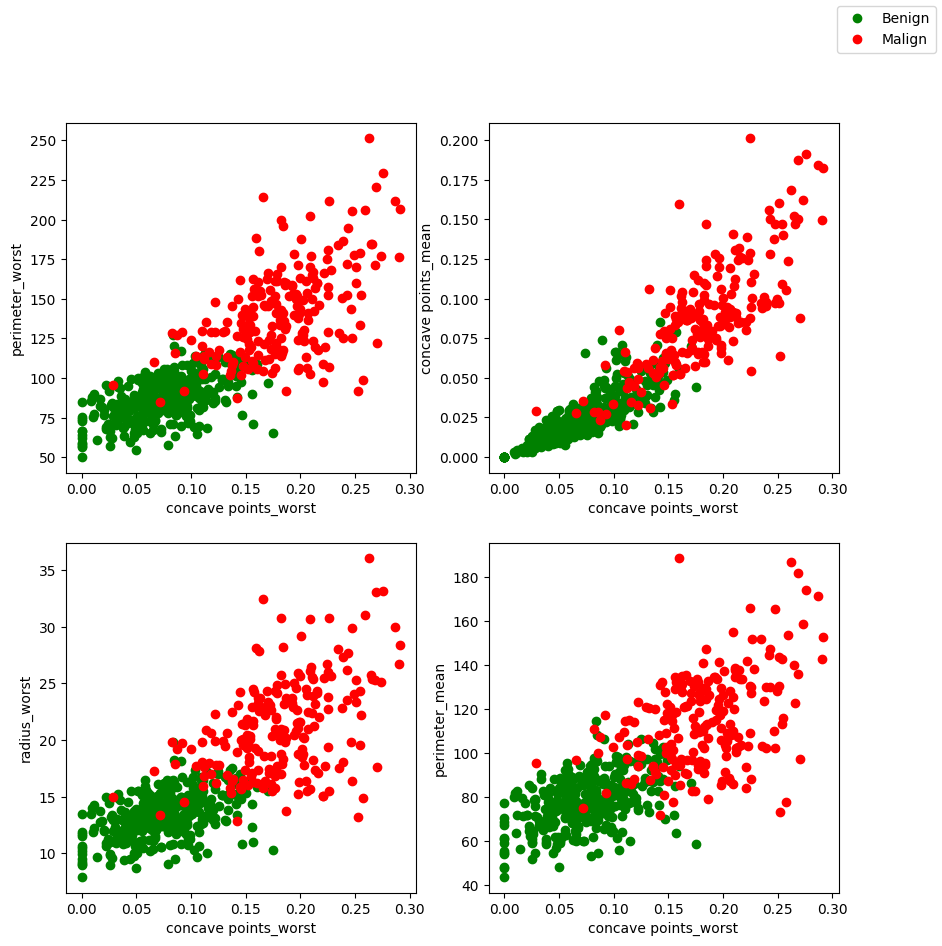

In [9]:
# plot two most correlated data with diagnosis

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = [10, 10]

benign = data[data["diagnosis"] == 1]
malign = data[data["diagnosis"] == 0]

combs = [
    ("concave points_worst", "perimeter_worst"),
    ("concave points_worst", "concave points_mean"),
    ("concave points_worst", "radius_worst"), 
    ("concave points_worst", "perimeter_mean")
]

x1_b = benign["concave points_worst"]
y1_b = benign["perimeter_worst"]

x1_m = malign["concave points_worst"]
y1_m = malign["perimeter_worst"]

fig, axes = plt.subplots(2, 2)
axes = [*axes[0], *axes[1]]

for (label1, label2), ax in zip(combs, axes):
    x_b = benign[label1]
    y_b = benign[label2]
    
    x_m = malign[label1]
    y_m = malign[label2]
    
    _ = ax.plot(x_b, y_b, color="green", marker="o", linestyle="None", label="Benign")
    _ = ax.plot(x_m, y_m, color="red", marker="o", linestyle="None", label="Malign")
    ax.set_box_aspect(1)
    _ = ax.set_xlabel(label1)
    _ = ax.set_ylabel(label2)
    
handles, labels = axes[0].get_legend_handles_labels()
_ = fig.legend(handles, labels)

plt.show()

In [5]:
# filter data with strong correlation (see cell above)

correlated_data = data.filter(items=[
    "diagnosis",
    "concave points_worst",
    "perimeter_worst",
    "concave points_mean",
    "radius_worst",
    "perimeter_mean",
    "area_worst",
    "radius_mean",
    "area_mean"
])
correlated_data

,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean
id,,,,,,,,,
842302,0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0
842517,0,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0
84300903,0,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0
84348301,0,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1
84358402,0,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0
...,...,...,...,...,...,...,...,...,...
926424,0,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0
926682,0,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0
926954,0,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1


In [6]:
# prepare training and testing data

X = correlated_data.drop("diagnosis", axis=1)
X = X.values
y = correlated_data["diagnosis"]
y = y.values

X
y

array([[2.654e-01, 1.846e+02, 1.471e-01, ..., 2.019e+03, 1.799e+01,
        1.001e+03],
       [1.860e-01, 1.588e+02, 7.017e-02, ..., 1.956e+03, 2.057e+01,
        1.326e+03],
       [2.430e-01, 1.525e+02, 1.279e-01, ..., 1.709e+03, 1.969e+01,
        1.203e+03],
       ...,
       [1.418e-01, 1.267e+02, 5.302e-02, ..., 1.124e+03, 1.660e+01,
        8.581e+02],
       [2.650e-01, 1.846e+02, 1.520e-01, ..., 1.821e+03, 2.060e+01,
        1.265e+03],
       [0.000e+00, 5.916e+01, 0.000e+00, ..., 2.686e+02, 7.760e+00,
        1.810e+02]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
# split into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5
)

X_train
X_test
y_train
y_test

array([[2.500e-02, 9.200e+01, 3.261e-03, ..., 6.369e+02, 1.320e+01,
        5.373e+02],
       [8.698e-02, 8.507e+01, 2.100e-02, ..., 5.213e+02, 1.136e+01,
        3.998e+02],
       [9.181e-02, 1.291e+02, 5.778e-02, ..., 1.228e+03, 1.808e+01,
        1.024e+03],
       ...,
       [1.964e-01, 1.496e+02, 1.198e-01, ..., 1.304e+03, 1.791e+01,
        9.940e+02],
       [2.034e-01, 1.303e+02, 9.479e-02, ..., 1.272e+03, 1.578e+01,
        7.826e+02],
       [5.588e-02, 6.708e+01, 1.952e-02, ..., 3.316e+02, 9.876e+00,
        2.954e+02]])

array([[2.024e-01, 1.493e+02, 8.751e-02, 2.027e+01, 1.024e+02, 1.269e+03,
        1.530e+01, 7.324e+02],
       [8.194e-02, 8.736e+01, 2.822e-02, 1.358e+01, 7.985e+01, 5.530e+02,
        1.234e+01, 4.645e+02],
       [1.221e-01, 1.028e+02, 5.778e-02, 1.570e+01, 9.428e+01, 7.455e+02,
        1.450e+01, 6.407e+02],
       [5.614e-02, 9.294e+01, 2.424e-02, 1.420e+01, 8.524e+01, 6.212e+02,
        1.330e+01, 5.461e+02],
       [3.264e-02, 8.390e+01, 8.160e-03, 1.303e+01, 6.889e+01, 5.056e+02,
        1.082e+01, 3.616e+02],
       [2.089e-01, 2.024e+02, 1.410e-01, 3.067e+01, 1.551e+02, 2.906e+03,
        2.351e+01, 1.747e+03],
       [1.155e-01, 9.220e+01, 3.791e-02, 1.324e+01, 7.787e+01, 5.461e+02,
        1.194e+01, 4.410e+02],
       [3.922e-02, 7.962e+01, 1.471e-02, 1.212e+01, 7.124e+01, 4.535e+02,
        1.114e+01, 3.846e+02],
       [1.108e-01, 1.141e+02, 6.300e-02, 1.646e+01, 9.822e+01, 8.092e+02,
        1.469e+01, 6.561e+02],
       [8.978e-02, 9.199e+01, 2.800e-02, 1.426e+01, 8.6

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0])